# Tetracycline Resistance Model

(c) 2021 Tom Röschinger. This work is licensed under a 
[Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). 
All code contained herein is licensed under an 
[MIT license](https://opensource.org/licenses/MIT).

In [2]:
using SymPy, Plots, Polynomials, Jedi, ColorSchemes

# Comment this out if Jedi.jl is not installed
Jedi.default_gr!()

Plots.GRBackend()

In this notebook we go through everything bla bla

In [32]:
@syms a λ λ0 κt Kd Δr j V0 aex KM Pout Pin

(a, λ, λ0, κt, Kd, Δr, j, V0, aex, KM, Pout, Pin)

In [33]:
eq1 = (a * λ) / (κt * Kd) - Δr * (1 - λ/λ0)

     ⎛  λ     ⎞    a⋅λ 
- Δr⋅⎜- ── + 1⎟ + ─────
     ⎝  λ₀    ⎠   Kd⋅κt

In [34]:
eq2 = a^2 * (-λ - λ^2 / (Kd * κt) - Pout) + a * (-λ * KM - KM * λ^2 / (Kd * κt) + Pin * aex - Pout * KM - V0 * λ/λ0 ) + Pin * aex * KM

                ⎛               2 ⎞     ⎛                      2              
              2 ⎜              λ  ⎟     ⎜                  KM⋅λ              V
KM⋅Pin⋅aex + a ⋅⎜-Pout - λ - ─────⎟ + a⋅⎜-KM⋅Pout - KM⋅λ - ───── + Pin⋅aex - ─
                ⎝            Kd⋅κt⎠     ⎝                  Kd⋅κt              

   ⎞
₀⋅λ⎟
───⎟
λ₀ ⎠

In [35]:
expr1 = solve(eq1, a)[1]

Kd⋅Δr⋅κt⋅(-λ + λ₀)
──────────────────
       λ⋅λ₀       

In [36]:
expr2 = subs(eq2, a=>expr1)

                                    ⎛               2 ⎞                      ⎛
               2   2   2          2 ⎜              λ  ⎟                      ⎜
             Kd ⋅Δr ⋅κt ⋅(-λ + λ₀) ⋅⎜-Pout - λ - ─────⎟   Kd⋅Δr⋅κt⋅(-λ + λ₀)⋅⎜
                                    ⎝            Kd⋅κt⎠                      ⎝
KM⋅Pin⋅aex + ────────────────────────────────────────── + ────────────────────
                                2   2                                         
                               λ ⋅λ₀                                          

                      2                 ⎞
                  KM⋅λ              V₀⋅λ⎟
-KM⋅Pout - KM⋅λ - ───── + Pin⋅aex - ────⎟
                  Kd⋅κt              λ₀ ⎠
─────────────────────────────────────────
         λ⋅λ₀                            
                                         

In [37]:
expr3 = subs(expr2, λ=>λ/λ0)

                                    2 ⎛                  2   ⎞                
               2   2   2 ⎛  λ      ⎞  ⎜        λ        λ    ⎟            ⎛  λ
             Kd ⋅Δr ⋅κt ⋅⎜- ── + λ₀⎟ ⋅⎜-Pout - ── - ─────────⎟   Kd⋅Δr⋅κt⋅⎜- ─
                         ⎝  λ₀     ⎠  ⎜        λ₀           2⎟            ⎝  λ
                                      ⎝             Kd⋅κt⋅λ₀ ⎠                
KM⋅Pin⋅aex + ───────────────────────────────────────────────── + ─────────────
                                      2                                       
                                     λ                                        

        ⎛                        2                   ⎞
      ⎞ ⎜           KM⋅λ     KM⋅λ                V₀⋅λ⎟
─ + λ₀⎟⋅⎜-KM⋅Pout - ──── - ───────── + Pin⋅aex - ────⎟
₀     ⎠ ⎜            λ₀            2               2 ⎟
        ⎝                  Kd⋅κt⋅λ₀              λ₀  ⎠
──────────────────────────────────────────────────────
                    λ                

In [38]:
expr3 = expr2 * λ^2 * λ0^2

       ⎛                                    ⎛               2 ⎞               
       ⎜               2   2   2          2 ⎜              λ  ⎟               
       ⎜             Kd ⋅Δr ⋅κt ⋅(-λ + λ₀) ⋅⎜-Pout - λ - ─────⎟   Kd⋅Δr⋅κt⋅(-λ
 2   2 ⎜                                    ⎝            Kd⋅κt⎠               
λ ⋅λ₀ ⋅⎜KM⋅Pin⋅aex + ────────────────────────────────────────── + ────────────
       ⎜                                2   2                                 
       ⎝                               λ ⋅λ₀                                  

       ⎛                      2                 ⎞⎞
       ⎜                  KM⋅λ              V₀⋅λ⎟⎟
 + λ₀)⋅⎜-KM⋅Pout - KM⋅λ - ───── + Pin⋅aex - ────⎟⎟
       ⎝                  Kd⋅κt              λ₀ ⎠⎟
─────────────────────────────────────────────────⎟
                 λ⋅λ₀                            ⎟
                                                 ⎠

In [39]:
expr4 = factor(expr3)

                  2                           2                3              
KM⋅Kd⋅Pout⋅Δr⋅κt⋅λ ⋅λ₀ - KM⋅Kd⋅Pout⋅Δr⋅κt⋅λ⋅λ₀  + KM⋅Kd⋅Δr⋅κt⋅λ ⋅λ₀ - KM⋅Kd⋅Δr

     2   2               2   2          4             3   2     2        2   2
⋅κt⋅λ ⋅λ₀  + KM⋅Pin⋅aex⋅λ ⋅λ₀  + KM⋅Δr⋅λ ⋅λ₀ - KM⋅Δr⋅λ ⋅λ₀  - Kd ⋅Pout⋅Δr ⋅κt 

  2       2        2   2          2        2   2   2     2   2   2  3       2 
⋅λ  + 2⋅Kd ⋅Pout⋅Δr ⋅κt ⋅λ⋅λ₀ - Kd ⋅Pout⋅Δr ⋅κt ⋅λ₀  - Kd ⋅Δr ⋅κt ⋅λ  + 2⋅Kd ⋅

  2   2  2        2   2   2     2                     2                       
Δr ⋅κt ⋅λ ⋅λ₀ - Kd ⋅Δr ⋅κt ⋅λ⋅λ₀  - Kd⋅Pin⋅aex⋅Δr⋅κt⋅λ ⋅λ₀ + Kd⋅Pin⋅aex⋅Δr⋅κt⋅

    2                3                2           2     4          2     3    
λ⋅λ₀  + Kd⋅V₀⋅Δr⋅κt⋅λ  - Kd⋅V₀⋅Δr⋅κt⋅λ ⋅λ₀ - Kd⋅Δr ⋅κt⋅λ  + 2⋅Kd⋅Δr ⋅κt⋅λ ⋅λ₀ 

       2     2   2
- Kd⋅Δr ⋅κt⋅λ ⋅λ₀ 

In [40]:
expr5 = collect(expr4, λ)

    2        2   2   2    4 ⎛                2   ⎞    3 ⎛                     
- Kd ⋅Pout⋅Δr ⋅κt ⋅λ₀  + λ ⋅⎝KM⋅Δr⋅λ₀ - Kd⋅Δr ⋅κt⎠ + λ ⋅⎝KM⋅Kd⋅Δr⋅κt⋅λ₀ - KM⋅Δ

    2     2   2   2                        2      ⎞    2 ⎛                    
r⋅λ₀  - Kd ⋅Δr ⋅κt  + Kd⋅V₀⋅Δr⋅κt + 2⋅Kd⋅Δr ⋅κt⋅λ₀⎠ + λ ⋅⎝KM⋅Kd⋅Pout⋅Δr⋅κt⋅λ₀ 

                2                2     2        2   2       2   2   2         
- KM⋅Kd⋅Δr⋅κt⋅λ₀  + KM⋅Pin⋅aex⋅λ₀  - Kd ⋅Pout⋅Δr ⋅κt  + 2⋅Kd ⋅Δr ⋅κt ⋅λ₀ - Kd⋅

                                         2      2⎞     ⎛                     2
Pin⋅aex⋅Δr⋅κt⋅λ₀ - Kd⋅V₀⋅Δr⋅κt⋅λ₀ - Kd⋅Δr ⋅κt⋅λ₀ ⎠ + λ⋅⎝- KM⋅Kd⋅Pout⋅Δr⋅κt⋅λ₀ 

       2        2   2        2   2   2   2                      2⎞
 + 2⋅Kd ⋅Pout⋅Δr ⋅κt ⋅λ₀ - Kd ⋅Δr ⋅κt ⋅λ₀  + Kd⋅Pin⋅aex⋅Δr⋅κt⋅λ₀ ⎠

In [41]:
println(expr5.coeff(λ, 4))
expr5.coeff(λ, 4)

KM*Δr*λ0 - Kd*Δr^2*κt


                2   
KM⋅Δr⋅λ₀ - Kd⋅Δr ⋅κt

In [42]:
println(expr5.coeff(λ, 3))
expr5.coeff(λ, 3)

KM*Kd*Δr*κt*λ0 - KM*Δr*λ0^2 - Kd^2*Δr^2*κt^2 + Kd*V0*Δr*κt + 2*Kd*Δr^2*κt*λ0


                         2     2   2   2                        2      
KM⋅Kd⋅Δr⋅κt⋅λ₀ - KM⋅Δr⋅λ₀  - Kd ⋅Δr ⋅κt  + Kd⋅V₀⋅Δr⋅κt + 2⋅Kd⋅Δr ⋅κt⋅λ₀

In [43]:
println(expr5.coeff(λ, 2))

KM*Kd*Pout*Δr*κt*λ0 - KM*Kd*Δr*κt*λ0^2 + KM*Pin*aex*λ0^2 - Kd^2*Pout*Δr^2*κt^2 + 2*Kd^2*Δr^2*κt^2*λ0 - Kd*Pin*aex*Δr*κt*λ0 - Kd*V0*Δr*κt*λ0 - Kd*Δr^2*κt*λ0^2


In [44]:
println(expr5.coeff(λ, 1))

-KM*Kd*Pout*Δr*κt*λ0^2 + 2*Kd^2*Pout*Δr^2*κt^2*λ0 - Kd^2*Δr^2*κt^2*λ0^2 + Kd*Pin*aex*Δr*κt*λ0^2


In [45]:
println(expr5.coeff(λ, 0))

-Kd^2*Pout*Δr^2*κt^2*λ0^2


In [46]:
function solve_polynomial(aex, λ0, κt, Kd, KM, j, V0, Δr)
    c = zeros(5)
    c[5] = KM*Δr*λ0 - Kd*Δr^2*κt
    c[4] = KM*Kd*Δr*κt*λ0 - KM*Δr*λ0^2 - Kd^2*Δr^2*κt^2 + Kd*V0*Δr*κt + 2*Kd*Δr^2*κt*λ0
    c[3] = KM*Kd*Pout*Δr*κt*λ0 - KM*Kd*Δr*κt*λ0^2 + KM*Pin*aex*λ0^2 - Kd^2*Pout*Δr^2*κt^2 + 2*Kd^2*Δr^2*κt^2*λ0 - Kd*Pin*aex*Δr*κt*λ0 - Kd*V0*Δr*κt*λ0 - Kd*Δr^2*κt*λ0^2
    c[2] = -KM*Kd*Pout*Δr*κt*λ0^2 + 2*Kd^2*Pout*Δr^2*κt^2*λ0 - Kd^2*Δr^2*κt^2*λ0^2 + Kd*Pin*aex*Δr*κt*λ0^2
    c[1] = -Kd^2*Pout*Δr^2*κt^2*λ0^2
    pol = Polynomial(c)
    return Polynomials.roots(pol)
end

solve_polynomial (generic function with 1 method)

In [53]:
_aex = 0  # µM
_λ0 = 0.68  # h**-1
_κt = 0.06  # µM**-1 h**-1
_Kd = .1  # µM
_KM = 10  # µM
_j = 10# h**-1
Pin = 10
Pout = 3
_V0 = 10000
_Δr = 46.5  # µM


a_ex_range = exp10.(-1:0.025:2)
sol_list = zeros(ComplexF64, 4, length(a_ex_range))
for (i, x) in enumerate(a_ex_range)
    # Pack parameters together
    args = (x, _λ0, _κt, _Kd, _KM, _j, _V0, _Δr)
    # Find roots
    sol_list[:, i] = solve_polynomial(args...)
end

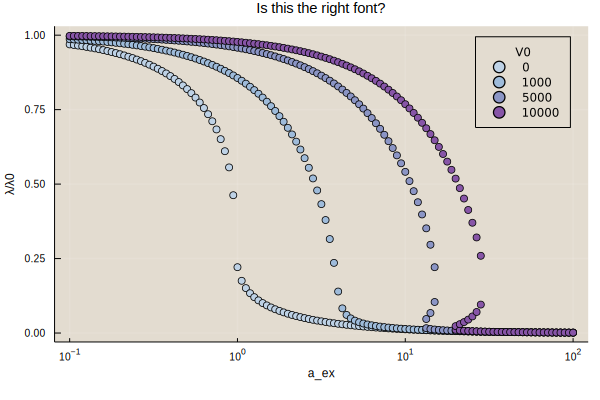

In [56]:
p = scatter(
    ylim=[0, 1],
    xscale=:log,
    legendtitle = "V0",
    ylabel="λ/λ0",
    xlabel="a_ex",
    title="Is this the right font?"
)

V_0_list = [0, 1000, 5000, 10000]
for (_V0, c) in zip(V_0_list, palette(:BuPu_6)[2:end])
    y = []
    x = Float64[]
    for i in 1:length(a_ex_range)
        args = (a_ex_range[i], _λ0, _κt, _Kd, _KM, _j, _V0, _Δr)
        solutions = solve_polynomial(args...)
        _y = [imag(x) == 0 ? real(x)/_λ0 : missing for x in solutions]
        push!(y, _y...)
        _x = ones(length(_y)) .* a_ex_range[i]
        push!(x, _x...)
    end
    scatter!(p, x, y, color=c, label="$_V0")
end
savefig(p, "res_model.pdf")
p